In [1]:
# Lance Bozeman
# Mohamed Tounkara
# Screekala Santhakumari

In [2]:
# libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef

#Classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import export_graphviz
import graphviz

In [3]:
from time import time

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import seaborn as sns; sns.set() 
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Data_Glioblastoma5Patients_SC.csv')

df.head(10)

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3,Classes
0,-3.80147,-3.889900,-3.985616,2.651558,2.170748,-2.550822,4.807330,3.961170,-0.192665,3.614482,...,2.909466,-3.118284,-1.538324,-1.550699,-1.558581,-1.920271,3.007439,-2.509017,-2.149696,Class1
1,-3.80147,-3.889900,-3.158708,2.358992,-6.041792,-0.056092,3.606735,-2.632250,2.249388,6.857517,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,2.539560,2.164481,-2.149696,Class1
2,-3.80147,-3.889900,1.733125,-5.820241,-6.041792,-0.576957,-2.473517,-4.354127,0.063178,-2.570976,...,-1.821098,5.521892,-1.538324,-1.550699,-1.558581,0.174665,-0.165409,0.734268,-2.149696,Class1
3,-3.80147,-3.889900,-1.665669,3.514271,-6.041792,-3.699171,4.509461,-4.354127,2.985972,-2.570976,...,4.952176,-0.854351,-1.538324,-1.550699,-1.558581,-3.068620,-1.884744,-2.509017,-2.149696,Class1
4,-3.80147,3.742495,-2.166992,-5.820241,2.094729,4.021873,5.535007,4.019633,2.560370,-2.570976,...,-1.821098,4.328808,-1.538324,7.021985,-1.558581,4.590946,-0.128456,-2.509017,-2.149696,Class1
5,-1.98770,-3.889900,4.691156,-4.006471,-3.449348,4.309767,4.002960,5.123457,0.341512,-2.570976,...,4.176419,-2.370500,-1.538324,-1.550699,-1.558581,-3.068620,-3.421540,-2.509017,-2.149696,Class1
6,-3.80147,-3.889900,2.656469,2.207608,-6.041792,4.235937,0.716257,-1.164354,2.630053,-2.570976,...,-1.821098,0.071490,-1.538324,5.651368,-1.558581,3.617386,1.384471,-2.509017,-2.149696,Class1
7,-3.80147,-3.889900,-1.914759,2.417820,3.162904,-3.699171,-2.473517,-4.354127,1.970206,-2.570976,...,-1.821098,3.615788,-1.538324,-1.550699,-1.558581,1.829214,5.237998,-2.509017,6.779879,Class1
8,-3.80147,-3.889900,0.483560,-5.820241,-6.041792,-3.699171,-2.473517,4.889074,-3.847544,-2.570976,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,-0.775154,1.953289,-2.149696,Class1
9,-3.80147,4.316243,1.828663,2.140173,-6.041792,3.721094,3.479903,-4.354127,-4.860593,-2.570976,...,-1.821098,-0.860025,0.841462,-1.550699,-1.558581,5.157919,4.710859,5.078266,4.977025,Class1


In [5]:
# Identifying classes

print(df['Classes'].value_counts())

Class1    118
Class2     94
Class3     75
Class4     73
Class5     70
Name: Classes, dtype: int64


In [6]:
# Partitioning data

Classes = df['Classes'].values

Features = df.drop(['Classes'], axis=1)

print(Features.describe())

print(df.groupby('Classes').size())

                A2M          AAAS          AAK1          AAMP          AARS  \
count  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02   
mean  -5.116023e-11  9.069777e-11  1.627909e-11 -7.674580e-11 -8.139630e-11   
std    4.907659e+00  3.641663e+00  2.474651e+00  3.563029e+00  3.909578e+00   
min   -3.801470e+00 -3.889900e+00 -3.985616e+00 -5.820241e+00 -6.041792e+00   
25%   -3.801470e+00 -3.889900e+00 -1.871573e+00 -3.807913e+00 -4.560471e+00   
50%   -3.801470e+00  4.099148e-01 -3.150282e-01  1.746972e+00  1.776033e+00   
75%    4.943281e+00  3.711243e+00  2.002047e+00  2.686033e+00  3.116038e+00   
max    1.170195e+01  5.840230e+00  5.389576e+00  4.520579e+00  6.366184e+00   

             AARSD1         AASDH      AASDHPPT          AASS          AATF  \
count  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02   
mean  -1.302323e-10 -2.255812e-10 -2.325458e-12  5.814004e-11 -1.511620e-10   
std    3.317166e+00  2.883981e+00  3.759008e+00  3.

In [7]:
# When creating a manual Machine learning algorithm one of the first things that has to be done
# is the partitioning of the data. Code must be written in order to identify and organize feature
# data from the output data. Descriptions and sample sizes must all be recognizable in order to 
# identify missing values or potential imbalance problems within the data. By not indentifying these
# anomalies could result in less than accurate Machine learning. 

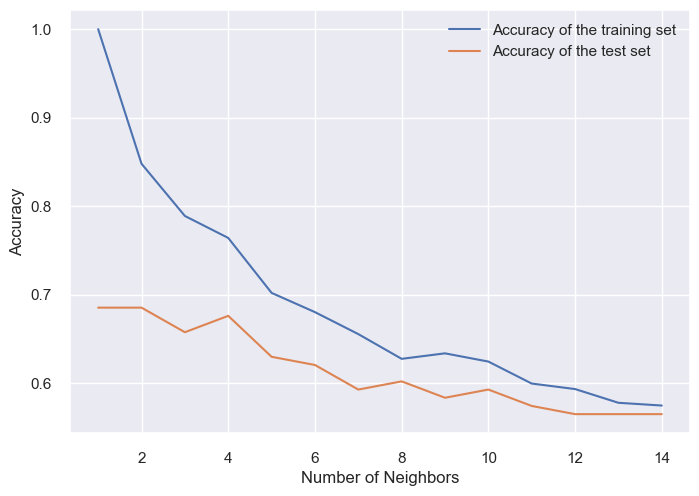

In [8]:
# Knn fit
X_train, X_test, y_train, y_test = train_test_split(Features, Classes, random_state=42)

training_acc = []
test_acc = []

neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_acc, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_acc, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [9]:
print("Accuracy of the training set for 6NN: {:3f}".format(training_acc[2]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_acc[2]))

Accuracy of the training set for 6NN: 0.788820
Accuracy of the test set for 6NN: 0.657407


In [10]:
# A Knn fit algorithm was first applied to the data in order to find the the nearest neighbors for the dataset.
# A graph had to be created in order to identify where the training set and the test set were the closest. Despite 
# a use of a loop being used, accuracy still had to be manually tested to find the most accurate number of neighbors.
# In this case, the most accurate number of neighbors for the training accuracy and the test accuracy was 2. The accuracy
# of the training set was found to be 78% and the accuracy of the test set was found to be 65%.

In [11]:
# Decision tree algorithm

tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')

Decision tree has 35 nodes with maximum depth 6.
Model Accuracy: 1.0


In [13]:
# In order to improve the accruacy of the Machine Learning a second algorithm was used. Our team decided on the use of a
# Decision Tree Classifier. The Decision Tree was found to have 35 nodes with a maximum depth of 6.   

In [14]:
param_grid = { 'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [2, 20, 50,70], 
               'max_leaf_nodes': [5, 9, 15, 21, 27]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_leaf_nodes': [5, 9, 15, 21, 27],
                         'min_samples_leaf': [2, 20, 50, 70]})

In [15]:
print(f'The best model is: \n{gs_dt.best_estimator_}')

The best model is: 
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=2)


In [16]:
tree_opt = gs_dt.best_estimator_

print(f'Decision tree has {tree_opt.tree_.node_count} nodes with maximum depth {tree_opt.tree_.max_depth}.') 

print(f'Model Accuracy: {tree_opt.score(X_train, y_train)}')

Decision tree has 9 nodes with maximum depth 4.
Model Accuracy: 0.906832298136646


In [17]:
# Further optimization using GridSearch CV results in a Decision Tree with 9 nodes and a maximum depth of 4. Model Accuracy
# is at 90%.

In [18]:
y_pred = tree.predict(X_test) 

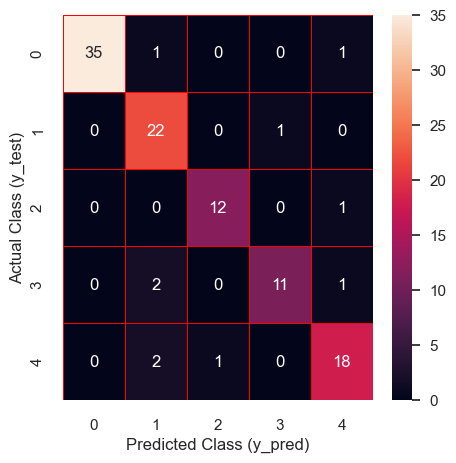

              precision    recall  f1-score   support

      Class1       1.00      0.95      0.97        37
      Class2       0.81      0.96      0.88        23
      Class3       0.92      0.92      0.92        13
      Class4       0.92      0.79      0.85        14
      Class5       0.86      0.86      0.86        21

    accuracy                           0.91       108
   macro avg       0.90      0.89      0.90       108
weighted avg       0.91      0.91      0.91       108



In [19]:
cm= confusion_matrix(y_test, y_pred)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Class (y_pred)")
plt.ylabel("Actual Class (y_test)")
plt.show()

print(classification_report(y_test, y_pred))

In [20]:
# After the use of two algorithms we tested the Machine Learning with a classification report and a confusion matrix.
# Our report found that the ML had a macro average score of 90%.

Auto ML

In [21]:
df = pd.read_csv('Data_Glioblastoma5Patients_SC.csv')

df.head(10)

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3,Classes
0,-3.80147,-3.889900,-3.985616,2.651558,2.170748,-2.550822,4.807330,3.961170,-0.192665,3.614482,...,2.909466,-3.118284,-1.538324,-1.550699,-1.558581,-1.920271,3.007439,-2.509017,-2.149696,Class1
1,-3.80147,-3.889900,-3.158708,2.358992,-6.041792,-0.056092,3.606735,-2.632250,2.249388,6.857517,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,2.539560,2.164481,-2.149696,Class1
2,-3.80147,-3.889900,1.733125,-5.820241,-6.041792,-0.576957,-2.473517,-4.354127,0.063178,-2.570976,...,-1.821098,5.521892,-1.538324,-1.550699,-1.558581,0.174665,-0.165409,0.734268,-2.149696,Class1
3,-3.80147,-3.889900,-1.665669,3.514271,-6.041792,-3.699171,4.509461,-4.354127,2.985972,-2.570976,...,4.952176,-0.854351,-1.538324,-1.550699,-1.558581,-3.068620,-1.884744,-2.509017,-2.149696,Class1
4,-3.80147,3.742495,-2.166992,-5.820241,2.094729,4.021873,5.535007,4.019633,2.560370,-2.570976,...,-1.821098,4.328808,-1.538324,7.021985,-1.558581,4.590946,-0.128456,-2.509017,-2.149696,Class1
5,-1.98770,-3.889900,4.691156,-4.006471,-3.449348,4.309767,4.002960,5.123457,0.341512,-2.570976,...,4.176419,-2.370500,-1.538324,-1.550699,-1.558581,-3.068620,-3.421540,-2.509017,-2.149696,Class1
6,-3.80147,-3.889900,2.656469,2.207608,-6.041792,4.235937,0.716257,-1.164354,2.630053,-2.570976,...,-1.821098,0.071490,-1.538324,5.651368,-1.558581,3.617386,1.384471,-2.509017,-2.149696,Class1
7,-3.80147,-3.889900,-1.914759,2.417820,3.162904,-3.699171,-2.473517,-4.354127,1.970206,-2.570976,...,-1.821098,3.615788,-1.538324,-1.550699,-1.558581,1.829214,5.237998,-2.509017,6.779879,Class1
8,-3.80147,-3.889900,0.483560,-5.820241,-6.041792,-3.699171,-2.473517,4.889074,-3.847544,-2.570976,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,-0.775154,1.953289,-2.149696,Class1
9,-3.80147,4.316243,1.828663,2.140173,-6.041792,3.721094,3.479903,-4.354127,-4.860593,-2.570976,...,-1.821098,-0.860025,0.841462,-1.550699,-1.558581,5.157919,4.710859,5.078266,4.977025,Class1


In [22]:
# Identifying classes

print(df['Classes'].value_counts())

Class1    118
Class2     94
Class3     75
Class4     73
Class5     70
Name: Classes, dtype: int64


In [23]:
# Importing pycaret classification method

from pycaret.classification import *

In [24]:
exp = setup(data = df, target = 'Classes', session_id=1 )

,Description,Value
0,Session id,1
1,Target,Classes
2,Target type,Multiclass
3,Target mapping,"Class1: 0, Class2: 1, Class3: 2, Class4: 3, Class5: 4"
4,Original data shape,"(430, 5949)"
5,Transformed data shape,"(430, 5949)"
6,Transformed train set shape,"(301, 5949)"
7,Transformed test set shape,"(129, 5949)"
8,Numeric features,5948
9,Preprocess,True


In [25]:
# With AutoML there is no need for partitioning the data. This process is automatically done after identifying
# The target value, in this case "Classes." Target type, data shape, numeric features, etc are all identified 
# by the ML.

In [26]:
best = compare_models(turbo = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4070
lr,Logistic Regression,0.9900,1.0000,0.9900,0.9915,0.9898,0.9873,0.9877,0.9980
svm,SVM - Linear Kernel,0.9801,0.0000,0.9801,0.9843,0.9805,0.9750,0.9759,0.4460
lightgbm,Light Gradient Boosting Machine,0.9800,0.9993,0.9800,0.9830,0.9799,0.9747,0.9755,0.8670
xgboost,Extreme Gradient Boosting,0.9634,0.9977,0.9634,0.9679,0.9633,0.9537,0.9549,0.6710
rf,Random Forest Classifier,0.9533,0.9988,0.9533,0.9597,0.9520,0.9407,0.9428,0.5900
et,Extra Trees Classifier,0.9501,0.9989,0.9501,0.9588,0.9491,0.9365,0.9393,0.5440
gbc,Gradient Boosting Classifier,0.9368,0.9947,0.9368,0.9455,0.9349,0.9198,0.9225,0.6700
lda,Linear Discriminant Analysis,0.9270,0.9934,0.9270,0.9375,0.9264,0.9076,0.9102,0.5500
dt,Decision Tree Classifier,0.8671,0.9183,0.8671,0.8899,0.8630,0.8316,0.8375,0.4630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [27]:
# By using the compare_models command numerous statistical techiques can be applied to the data and compared to each
# other to determine which model provides the most accurate result for the ML. In this case the AutoML has indicated that
# the use of a Ridge Classifier results in the most accurate learning. According to the AutoMl KNN results in an
# accuracy of only 67%, while Decision Tree has an accuracy of 86%.

In [28]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [29]:
# The evaluate_model command allows for widgets to be applied to the notebook and can be accessed at the click of a mouse
# as long as the proper libraries are installed/imported. These widgets can show Feature Importance, Decision Tree, AUC,
# Class Report, etc.

In [31]:
knn_model = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6129,0.8719,0.6129,0.7763,0.6134,0.5181,0.5637
1,0.7667,0.9137,0.7667,0.8367,0.7702,0.7038,0.7213
2,0.6000,0.9158,0.6000,0.8824,0.6089,0.4972,0.5768
3,0.6000,0.9539,0.6000,0.8521,0.6069,0.5014,0.5692
4,0.7333,0.9146,0.7333,0.8974,0.7562,0.6662,0.7074
5,0.7333,0.9806,0.7333,0.8974,0.7568,0.6667,0.7078
6,0.6333,0.8906,0.6333,0.7595,0.6383,0.5436,0.5877
7,0.6667,0.9282,0.6667,0.8889,0.6775,0.5828,0.6432
8,0.6333,0.9526,0.6333,0.8356,0.6671,0.5461,0.5995


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

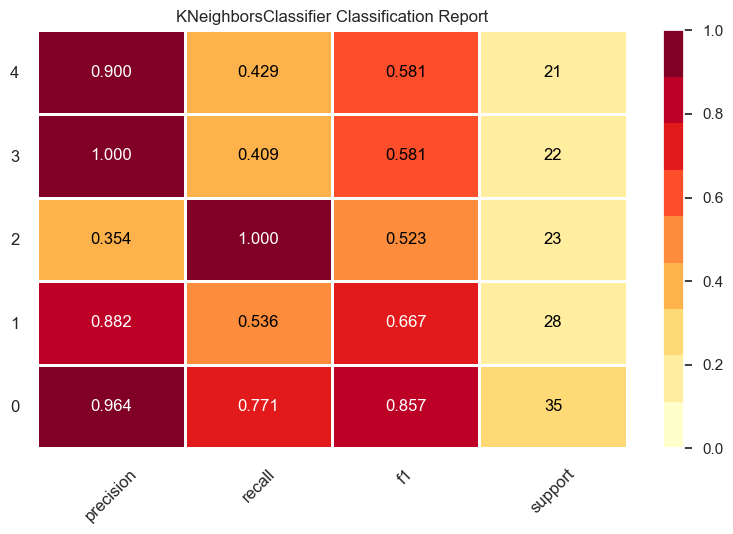

In [32]:
plot_model(knn_model, plot = 'class_report')

In [33]:
dt_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.9200,0.8710,0.9032,0.8516,0.8347,0.8450
1,0.9667,0.9800,0.9667,0.9722,0.9663,0.9576,0.9590
2,0.8667,0.9200,0.8667,0.8869,0.8704,0.8305,0.8341
3,0.9000,0.9383,0.9000,0.9014,0.8960,0.8738,0.8762
4,0.8667,0.9183,0.8667,0.8778,0.8694,0.8315,0.8326
5,0.8333,0.8938,0.8333,0.8519,0.8171,0.7872,0.7953
6,0.7667,0.8565,0.7667,0.8556,0.7565,0.7034,0.7232
7,0.8667,0.9200,0.8667,0.9042,0.8715,0.8331,0.8413
8,0.8667,0.9165,0.8667,0.8667,0.8644,0.8310,0.8322


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

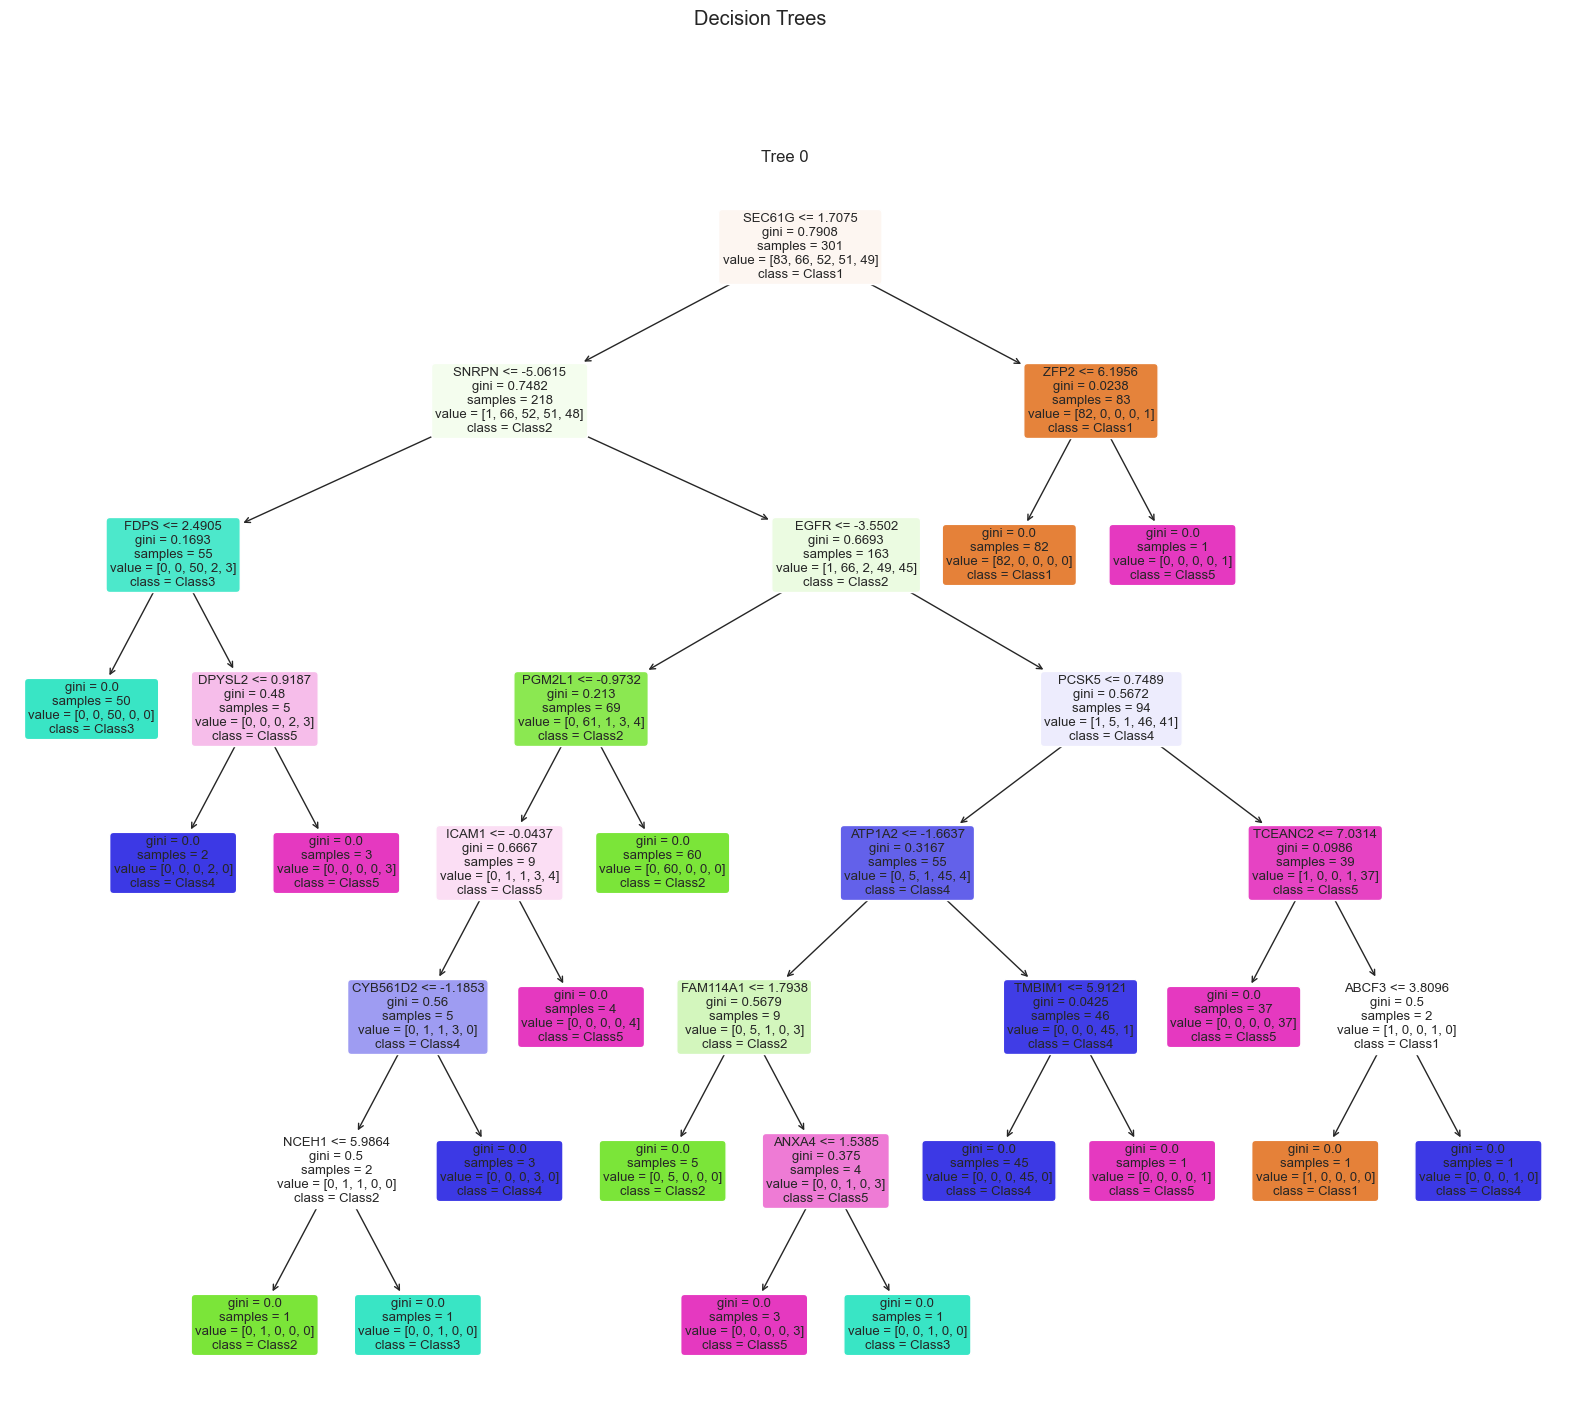

In [34]:
plot_model(dt_model, plot = 'tree')

In [35]:
ridge_model = create_model('ridge', alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=1, solver='auto',
                tol=0.0001)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

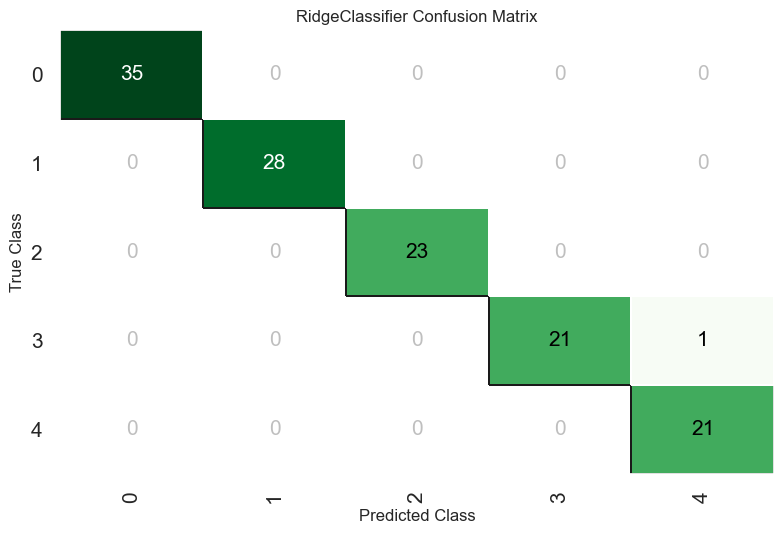

In [36]:
plot_model(ridge_model, plot = 'confusion_matrix')

In [37]:
predict_model(knn_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6434,0.9188,0,0,0,0.5532,0.6059


In [38]:
predict_model(dt_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8295,0.8964,0,0,0,0.7851,0.7861


In [39]:
predict_model(ridge_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9922,0,0,0,0,0.9902,0.9903


In [ ]:
# By using AutoML our team was able to simply select the most accurate model, in this case it was the Ridge Classifier,
# and load a prediction model as well as a confusion matrix using relatively simple commands. This model was found to have
# an accuracy of 99%.

In [ ]:
# ML vs. AutoML

# The first major difference between the two is that with normal ML the user is required to the clean, organize,
# and partition the data before it can be used. This includes making sure there are no removing null values,
# identifiying Features from Output, and then organizing the data. The user then has to create descriptions for the
# data and identify sample sizes. Identification of the sample sizes needs to be noted in case any imbalance problems 
# arise in the machine learning process. With AutoML all of these issues are performed automatically with, in some cases, 
# simplier command code. SessionID and Target values are identified with a single line of code. Target type, target mapping,
# data shape are all identified by AutoML.

# The second major difference has to do with what algorithms are used for the ML process. In normal ML the user has to decide
# the most efficient algorithms to use that will produce the most accurate ML. This can be a very time consuming process
# because the decision of what algorithms to use is highly predicated on the size of the data, potential imbalance problems,
# etc. With the ever present possibility of overfitting the data in the background. Algorithms need to be used, tested,
# manipulated, and removed based on extensive testing of the data. With AutoML this process is done with numerous different
# statisical models all at the same time. Then the user it shown the most accurate model at the end of the analysis. Very
# convenient.

# The third major difference has to do with the graphing, predictions, and scoring. In normal ML all of these things have
# to be coded. While scores are relatively easy to code in normal ML, prediction models abnd graphs have to be manually coded
# for every detail the user wants to be shown. Graphs can be very time consuming and take of a lot space in notebooks. With
# AutoML retrieving any number of these things is very easy. In some cases they can be produced all at the same time with
# the use of widgets or even a single line of code. The use of widgets is incredibly helpful as it produces a clickable 
# graphic that loads up helpful graphs and information, as long as the proper libraries have been installed and imported.

# The last major difference between the two seems to be in the speed at which it can handle large amounts of data. AutoML
# seems to be highly limited by computational power. At 10,000 data entries the process of analysing data causes AutoML 
# to run very slowly. Even 5,000 data entries seems to slow the process down a considerable amount. With normal ML large
# amounts of data  with slow the process down, it will also make EDA reports impossible, but there are still ways to prune
# and analysis data in a relatively effective manner.

# In conclusion, while there are major differences between ML and AutoML both seem to have a place in field of anaylsing
# data. ML requires extensive analysis and testing when using different algorithms in order to produce the most accurate
# results. However, this testing and analysis allows for a better understanding of the methods that go into classifiying
# data. AutoML makes things very easy. It seems to be limited currently by computational power. In the future this will not
# be a problem. But there is a problem with letting a machine perform all analysis of data. What gets lost is the
# understanding of how the methods of the machine work. If we let the machine perform all of the work the understanding of 
# how each statistical method used are completely lost on the user. In that regard it becomes more and more difficult for
# the user to explain to a layperson the output of the machine.


